In [1]:
# import tensorflow as tf

# a0 = tf.constant([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
# a1 = tf.constant([[11, 12], [13, 14], [15, 16], [17, 18], [19, 110]])
# a = tf.keras.layers.concatenate([a0, a1], axis=0)
# b = tf.constant([0, 3])
# print(tf.gather_nd(a, b))
# c = tf.Variable([3*2, 3*2 + 1])
# print(tf.gather(a, c, axis=0))
# print(a.shape)

In [2]:
import pickle
import numpy as np
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Chem
from IPython.display import SVG
from rdkit.Chem.Draw import MolToImage
from rdkit.Chem import Draw

def idxForSignificants(th_, aWeight):
    retlist = []
    for idx, ele in enumerate(aWeight):
        if ele >= th_:
            retlist.append(idx)
    return retlist

def idxMerge(indices):
    if len(indices) == 1:
        return indices
    retlist = []
    for i, idx in enumerate(indices):
        if i == len(indices) - 1:
            d
        else:
            if indices[i] - idx > 2:
                continue
            elif indices[i] - idx == 2:
                retlist.append(idx)
        
    
def idxSigs(sigIdx, currSmiList):
    atomIdx, bondIdx = [], []
    twoChars = {"AL":1, "al":1, "Al":1, "AU":1, "au":1, "Au":1, "MG":1, "mg":1, "Mg":1, "ZN":1, "zn":1, "Zn":1, "CA":1, "ca":1, "Ca":1, "NA":1, "na":1, "Na":1, "CL":1, "cl":1, "Cl":1, "FE":1, "fe":1, "Fe":1, "BR":1, "br":1, "Br":1}
    for idx, ele in enumerate(currSmiList):
        if ele in twoChars or ele.isalpha():
            if idx in sigIdx:
                atomIdx.append(idx)
    mol = Chem.MolFromSmiles("".join(currSmiList))
    patt = Chem.MolFromSmarts('ClccccF')
    hit_ats = list(mol.GetSubstructMatch(patt))
            
def idxSeparate_old(sigIdx, currSmiList):
    atomIdx, bondIdx = [], []
    atomCnt = 0
    bondCnt = 0
    mol = Chem.MolFromSmiles("".join(currSmiList))
    size = mol.GetNumAtoms()
    twoChars = {"AL":1, "al":1, "Al":1, "AU":1, "au":1, "Au":1, "MG":1, "mg":1, "Mg":1, "ZN":1, "zn":1, "Zn":1, "CA":1, "ca":1, "Ca":1, "NA":1, "na":1, "Na":1, "CL":1, "cl":1, "Cl":1, "FE":1, "fe":1, "Fe":1, "BR":1, "br":1, "Br":1}
    for idx, ele in enumerate(currSmiList):
        if atomCnt >= size:
            break
        if ele in twoChars or ele.isalpha():
            if idx in sigIdx:
                atomIdx.append(atomCnt)
            atomCnt += 1

    for start in atomIdx[:-1]:
        for end in atomIdx[::-1]:
            if start == end:
                break
            #print("".join(currSmiList), start, end)
            tmpbond = mol.GetBondBetweenAtoms(start, end)
            if tmpbond:
                bondIdx.append(start)
    return atomIdx, bondIdx


#attnweights, teststr = pickle.load( open( "../save_weights", "rb" ) )
convweights, teststr = pickle.load( open( "save_weight1", "rb" ) )

713


/home/slim/anaconda3/envs/anytime/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  % (maxMols))


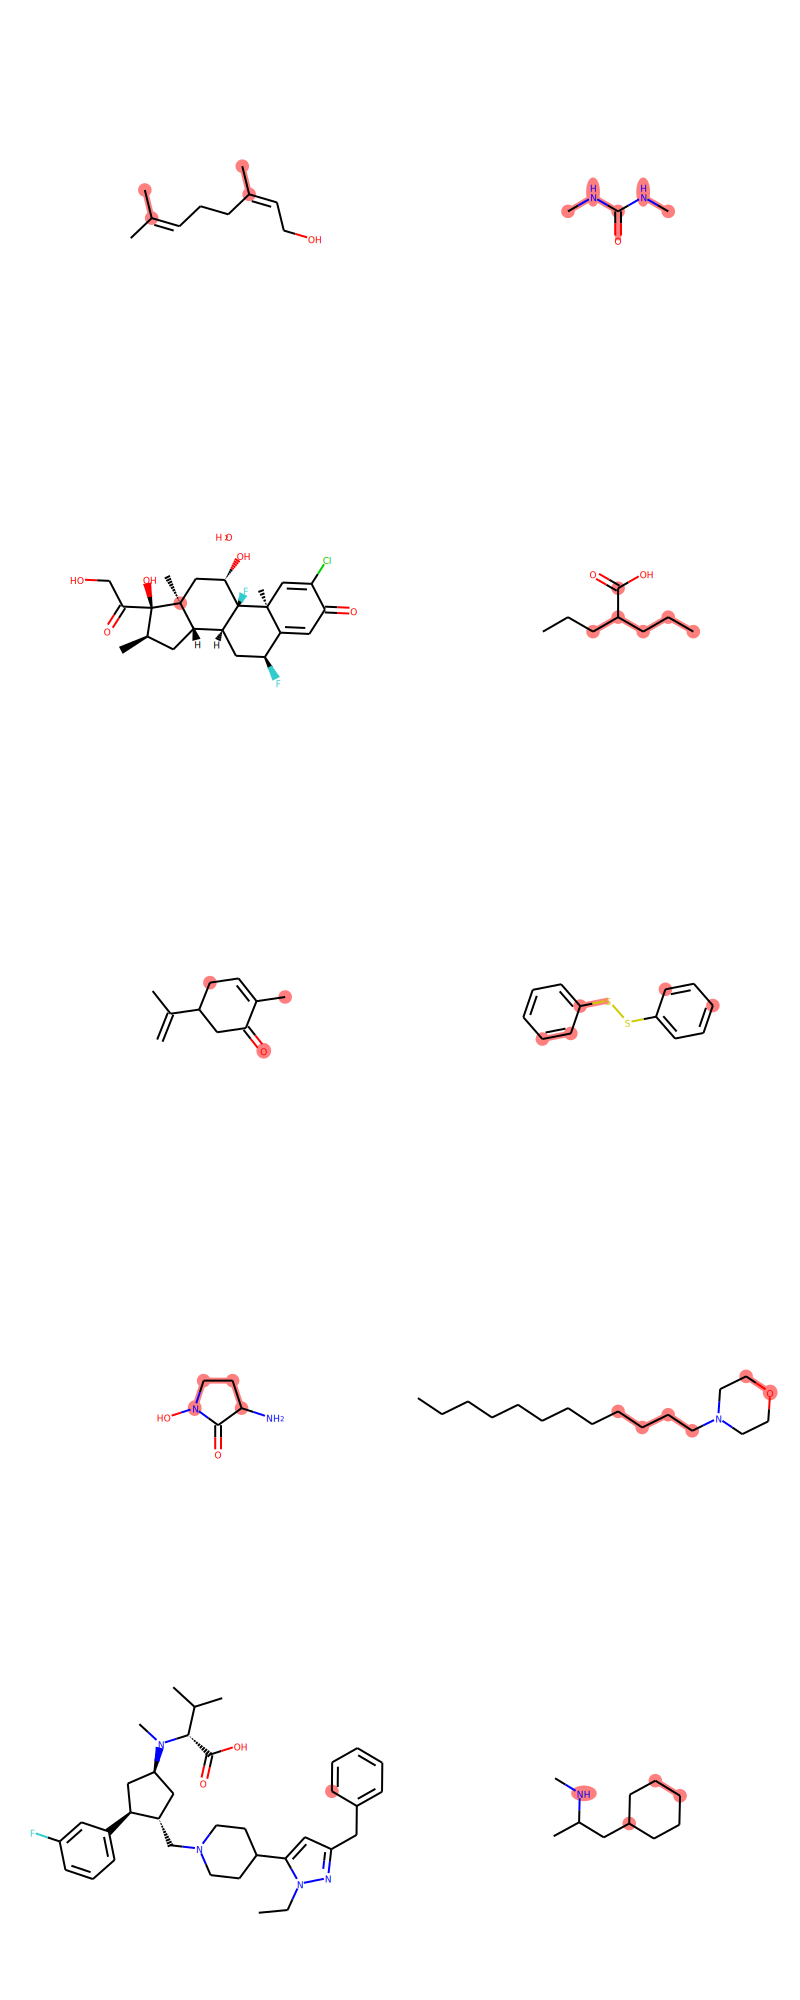

In [3]:
# conv_weights.shape == (batch_size, seq_len, self.d_model)
print(len(convweights))
layer1 = np.squeeze(convweights)#layer1 shape = (whole_size, seq_len, self.d_model)
layer1_max = np.amax(layer1, axis=2)#layer1T_sum shape = (whole_size, seq_len)
# print(layer1_sum[0], max(layer1_sum[0]))
allMols = []
allAtomIdx = []
allBondIdx = []
for i, ele in enumerate(layer1_max):
    th_Until7thW = sorted(ele)[-7]
    sigIdxList = idxForSignificants(th_Until7thW, ele)
    atomIdx, bondIdx = idxSeparate(sigIdxList, teststr[i])
    smi = "".join(teststr[i])
    mol = Chem.MolFromSmiles(smi)
    allMols.append(mol)
    allAtomIdx.append(atomIdx)
    allBondIdx.append(bondIdx)

# for i in range(10):
#     print(allAtomIdx[i], allBondIdx[i])
#img = MolToImage(mol, size=(600, 600), fitImage=False)#, highlightAtoms=atomIdx, highlightBonds=bondIdx)   
#img
#print(smi)
img = Draw.MolsToGridImage( allMols, molsPerRow=2, highlightAtomLists=allAtomIdx, highlightBondLists=allBondIdx, useSVG=True, subImgSize=(400, 400), maxMols=10)
img


In [4]:
bioalert_nr_ar_lbd = pickle.load( open( "nr-ar-lbd_alerts", "rb" ) )

In [5]:
dic = {}
act1, act0 = 0, 0
for idx, key in enumerate(bioalert_nr_ar_lbd['Substructure in Molecule']):#molecule duplicated
    actlabel = bioalert_nr_ar_lbd['Activity label'][idx]
    
    if actlabel == 1.0:
        act1 += 1
        dic[Chem.MolToSmiles(key)] = 1
    else:
        act0 += 1
        if Chem.MolToSmiles(key) in dic and dic[Chem.MolToSmiles(key)] == 1:
            dic[Chem.MolToSmiles(key)] = 1
        else:
            dic[Chem.MolToSmiles(key)] = 0
print(act1, act0)
print(len(dic))

cnt, cntPos = 0, 0
for currSmiList in teststr:
    currsmi = "".join(currSmiList)

    if currsmi in dic:
        cnt += 1
        if dic[currsmi] == 1:
            cntPos += 1
print(cnt, cntPos)

213 3159
1320
136 9


In [6]:
dic = {}
for idx, key in enumerate(bioalert_nr_ar_lbd['Substructure in Molecule']):#molecule duplicated
    smikey = Chem.MolToSmiles(key)
    if smikey in dic:
        dic[smikey].append(idx)
    else:
        dic[smikey] = [idx]
print(len(dic))

def howManyAshareB(A, B):
    share, notshare = 0, 0
    
    for ele in A:
        if ele in B:
            share += 1
        else:
            notshare += 1
    return share, notshare, share + notshare


layer1 = np.squeeze(convweights)#layer1 shape = (whole_size, seq_len, self.d_model)
layer1_max = np.amax(layer1, axis=2)#layer1T_sum shape = (whole_size, seq_len)
for i, currSmiList in enumerate(teststr):
    currsmi = "".join(currSmiList)
    currmol = Chem.MolFromSmiles(currsmi)
    if currsmi in dic:
        th_Until7thW = sorted(layer1_max[i])[-7]
        sigIdxList = idxForSignificants(th_Until7thW, layer1_max[i])
        atomIdx, bondIdx = idxSeparate(sigIdxList, teststr[i])
        
        for idx in dic[currsmi]:
            sigAtomsInMol = list(currmol.GetSubstructMatch(bioalert_nr_ar_lbd['Substructure'][idx]))
            print("shared, not shared, total:", howManyAshareB(sigAtomsInMol, atomIdx))

1320
shared, not shared, total: (1, 12, 13)
shared, not shared, total: (1, 5, 6)
shared, not shared, total: (1, 5, 6)
shared, not shared, total: (5, 4, 9)
shared, not shared, total: (5, 4, 9)
shared, not shared, total: (2, 5, 7)
shared, not shared, total: (1, 7, 8)
shared, not shared, total: (2, 5, 7)
shared, not shared, total: (3, 13, 16)
shared, not shared, total: (3, 11, 14)
shared, not shared, total: (4, 12, 16)
shared, not shared, total: (4, 6, 10)
shared, not shared, total: (4, 4, 8)
shared, not shared, total: (4, 4, 8)
shared, not shared, total: (4, 3, 7)
shared, not shared, total: (3, 2, 5)
shared, not shared, total: (1, 7, 8)
shared, not shared, total: (1, 9, 10)
shared, not shared, total: (0, 9, 9)
shared, not shared, total: (0, 11, 11)
shared, not shared, total: (1, 6, 7)
shared, not shared, total: (0, 10, 10)
shared, not shared, total: (3, 4, 7)
shared, not shared, total: (1, 5, 6)
shared, not shared, total: (2, 4, 6)
shared, not shared, total: (4, 4, 8)
shared, not shared,